In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import matplotlib.ticker as ticker

### 3.3 ) 

In [2]:
data = pd.read_csv("3_3.csv", delimiter=";")
data


,Courant alimentation (mA),Puissance diode (µW),Courant photodiode interne (mA)
0,15.0,6.13,0.000
1,22.5,11.40,0.001
2,30.0,20.45,0.002
3,40.0,680.00,0.047


In [3]:
I_alim = data["Courant alimentation (mA)"]
P_diode = data["Puissance diode (µW)"] * 1e-3
I_photo = data["Courant photodiode interne (mA)"]

S = I_photo / P_diode
data["Sensibilité (mA/mW)"] = S

S_moy = np.mean(S)
print("Moyenne sensibilité (mA/mW) :", S_moy)


Moyenne sensibilité (mA/mW) : 0.06365911407672063


### 3.4 ) 

1/ Déterminer R

In [4]:
data = pd.read_csv("3_4.csv", delimiter=";")
data.columns

Index(['Courant d'alimentation (mA)', 'Tension diode laser (V) '], dtype='object')

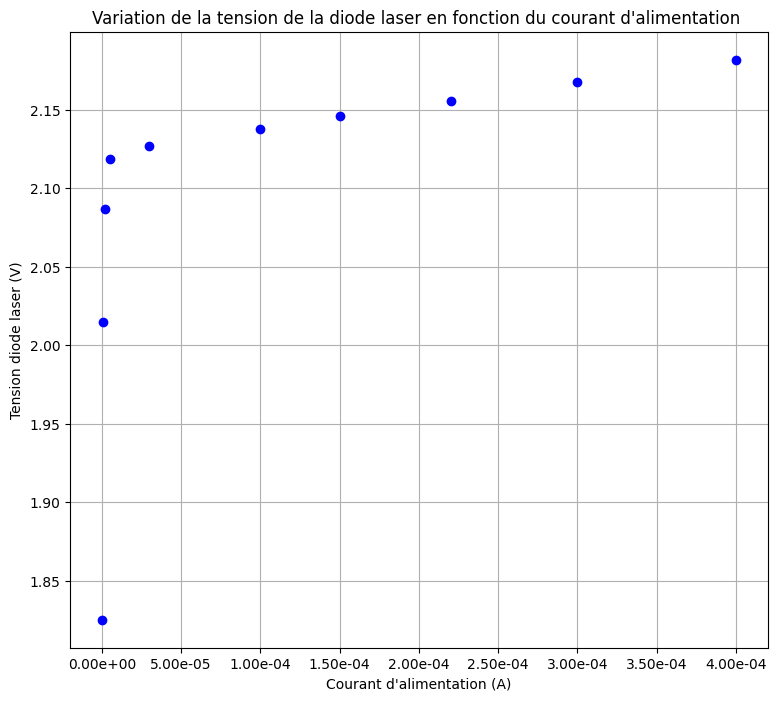

In [5]:
I_alim = data["Courant d'alimentation (mA)"] * 1e-3
U_photo = data['Tension diode laser (V) ']

plt.figure(figsize=(9, 8))
plt.plot(I_alim, U_photo, 'o', color="blue")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2e}'))
plt.title("Variation de la tension de la diode laser en fonction du courant d'alimentation ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Tension diode laser (V)")
plt.grid()
plt.show()

La résistance interne estimée est : 155.033 Ohms


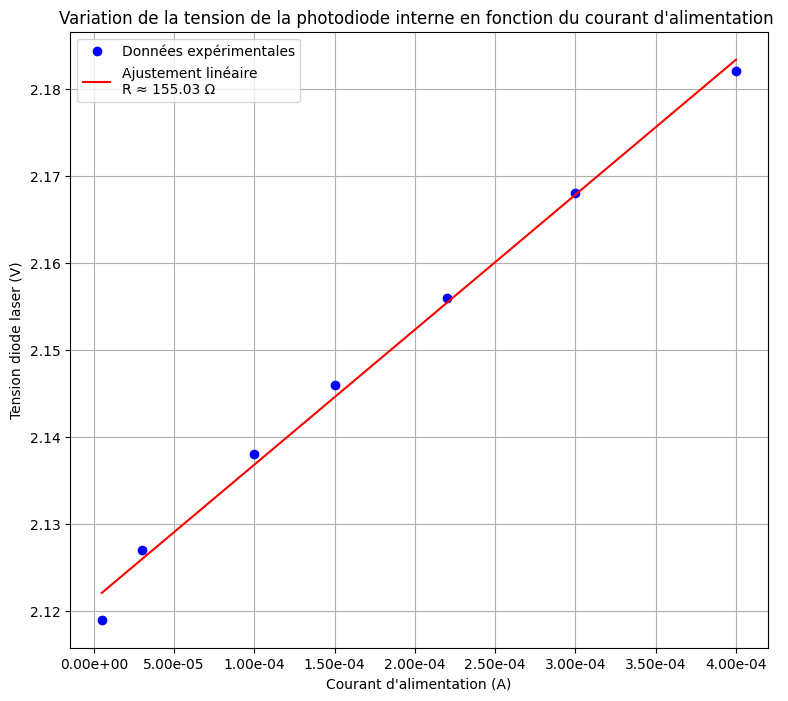

In [6]:
start_index = 3 
end_index = 10

I_linear = I_alim[start_index:end_index]
U_linear = U_photo[start_index:end_index]

coefficients = np.polyfit(I_linear, U_linear, 1)  
slope = coefficients[0]  
print(f"La résistance interne estimée est : {slope:.3f} Ohms")

plt.figure(figsize=(9, 8))
plt.plot(I_alim[3:], U_photo[3:], 'o', color="blue", label="Données expérimentales")
plt.plot(I_linear, np.polyval(coefficients, I_linear), color="red", label=f"Ajustement linéaire\nR ≈ {slope:.2f} Ω")
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.2e}'))
plt.title("Variation de la tension de la photodiode interne en fonction du courant d'alimentation ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Tension diode laser (V)")
plt.legend()
plt.grid()
plt.show()

2/ Déterminer longueur d'onde moyenne

In [7]:
h = 6.626e-34  
c = 3.00e8     
e = 1.602e-19  

# Estimation de la tension seuil à partir de la courbe 
U_seuil = 2.119

# Calcul de la longueur d'onde
lambda_m = (h * c) / (e * U_seuil)  
lambda_nm = lambda_m * 1e9  

print(f"Longueur d'onde moyenne estimée : {lambda_nm:.1f} nm")

Longueur d'onde moyenne estimée : 585.6 nm


In [8]:
lambda_th = 635 * 1e-9
U_th = (h * c) / (e * lambda_th)  
print(U_th)

1.9540534961219735


### 3.5 )

### T = 10 kOhm

In [9]:
data = pd.read_csv("3_5_T10.csv", delimiter=";")
data = data.sort_values(by="Courant d'alimentation (mA)").reset_index(drop=True)
nom_actuel_derniere_colonne = data.columns[-1]
data.rename(columns={nom_actuel_derniere_colonne: "Tension diode laser (V)"}, inplace=True)
data
# La Puissance émise du tableau correspond à celle mesurée avec le wattmètre
# Mais comme on a déjà fait l'étalonnage, il n'est pas nécessaire de mesurer cette puissance. Néanmoins, on peut comparer celle calculée et mesurée.


,Courant d'alimentation (mA),Courant photodiode interne (mA),Puissance émise(W),Tension diode laser (V)
0,20.0,0.0010,0.000009,2.035
1,23.4,0.0010,0.000012,2.053
2,28.2,0.0020,0.000018,2.078
3,30.0,0.0020,0.000021,2.087
4,35.0,0.0030,0.000039,2.110
5,38.0,0.0130,0.000223,2.124
6,40.0,0.0066,0.000939,2.132
7,43.1,0.1450,0.002008,2.144
8,45.7,0.2150,0.003062,2.155
9,48.1,0.2740,0.003977,2.164


In [10]:
I_alim = data["Courant d'alimentation (mA)"] * 1e-3
I_photo = data["Courant photodiode interne (mA)"] * 1e-3
P_emise = data["Puissance émise(W)"]
U_photo = data["Tension diode laser (V)"]

P_emise_calcul = I_photo / S_moy
print(P_emise_calcul)

0     0.000016
1     0.000016
2     0.000031
3     0.000031
4     0.000047
5     0.000204
6     0.000104
7     0.002278
8     0.003377
9     0.004304
10    0.004477
11    0.005105
12    0.005419
Name: Courant photodiode interne (mA), dtype: float64


Courbe P_emise en fonction de I_alim

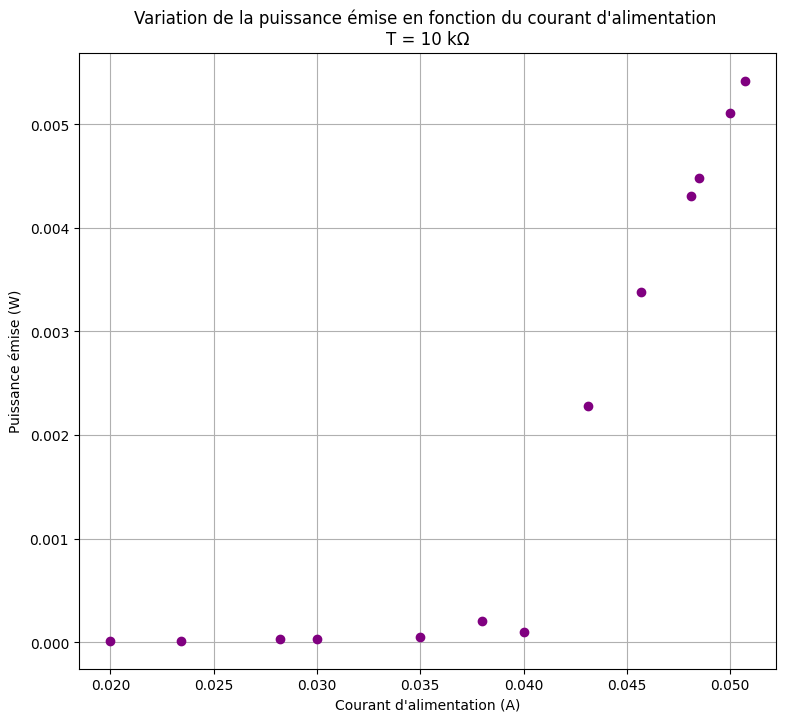

In [11]:
plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise_calcul, "o", color="purple")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 10 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.grid()
plt.show()

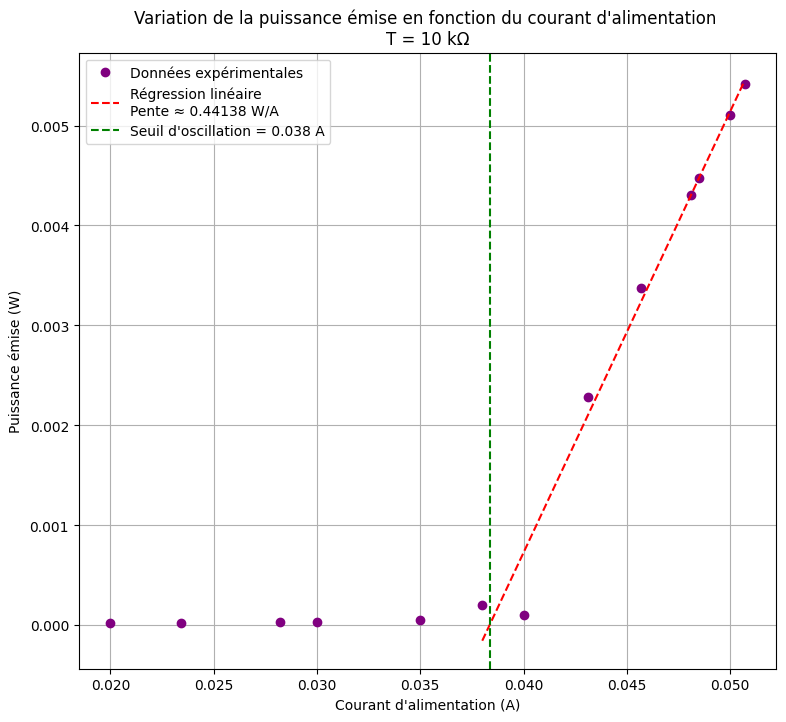

In [12]:
i_start, i_end = 5, 13
I_fit = I_alim[i_start:i_end]
P_fit = P_emise_calcul[i_start:i_end]
slope, intercept, r, _, _ = linregress(I_fit, P_fit)

seuil_osc= -intercept / slope

plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise_calcul, 'o', label="Données expérimentales", color="purple")
plt.plot(I_fit, slope * I_fit + intercept, 'r--',
         label=f"Régression linéaire \nPente ≈ {slope:.5f} W/A")
plt.axvline(seuil_osc, color='green', linestyle='--', label=f"Seuil d'oscillation = {seuil_osc:.3f} A")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 10 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.legend()
plt.grid()
plt.show()



( Avec le wattmètre, on mesure la puissance lumineuse émise par la diode laser (appli ordi))


Vérifier sur feuille de TP la formule de la puissance électrique dissipée

L'efficacité totale mesure l'efficacité globale avec laquelle la diode laser transforme l'énergie électrique en énergie lumineuse.

Puissance seuil : 0.00020421270682989196
Efficacité totale : 0.01886
Efficacité différentielle : 0.01890 


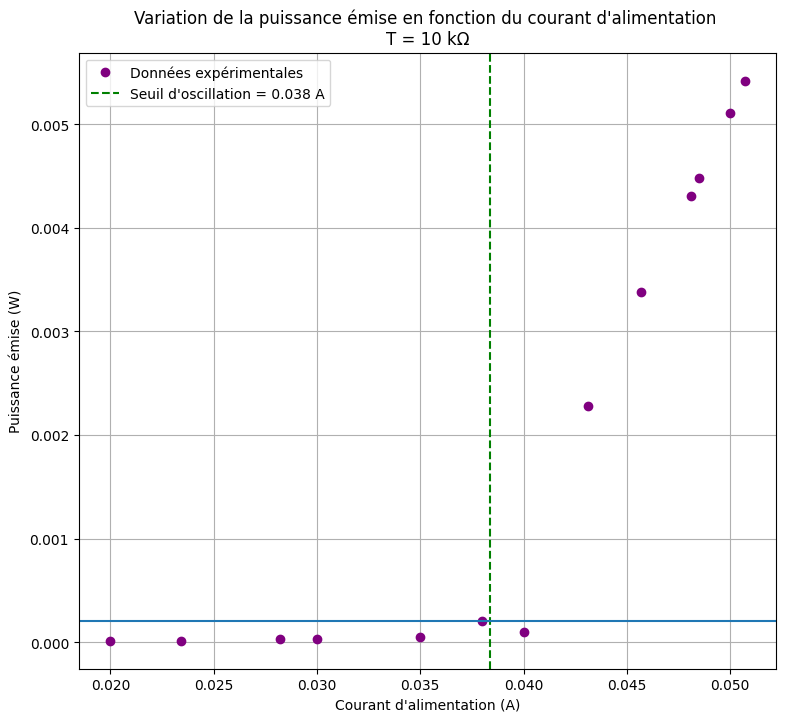

In [13]:
# Puissance électrique dissipée (en W)
P_dissip = U_photo * I_alim

# Calcul de l'efficacité totale
eff_totale = P_emise_calcul / P_dissip

# Puissance seuil (à déterminer avec le graphe précédent
idx_proche_seuil = (np.abs(I_alim - seuil_osc)).idxmin()
I_alim_reel_proche = I_alim[idx_proche_seuil]
P_seuil = P_emise_calcul[idx_proche_seuil]

# Calcul de l'efficacité différentielle
eff_diff = P_emise_calcul / (P_dissip - P_seuil)  # En mW/(W - W)

# Afficher les résultats
print("Puissance seuil :", P_seuil)
print(f"Efficacité totale : {np.mean(eff_totale):.5f}")
print(f"Efficacité différentielle : {np.mean(eff_diff):.5f} ")


# Vérification sur graphe 
plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise_calcul, 'o', label="Données expérimentales", color="purple")
plt.axvline(seuil_osc, color='green', linestyle='--', label=f"Seuil d'oscillation = {seuil_osc:.3f} A")
plt.axhline(P_seuil)
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 10 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.legend()
plt.grid()
plt.show()



### T = 12 kOhm

In [32]:
data = pd.read_csv("3_5_T12.csv", delimiter=";")
data = data.sort_values(by="Courant d'alimentation (mA)").reset_index(drop=True)
data

,Courant d'alimentation (mA),Courant photodiode interne (mA),Puissance émise(W),Tension photodiode interne (V)
0,20.0,0.001,0.000012,2.040
1,24.2,0.001,0.000016,2.064
2,29.0,0.002,0.000024,2.089
3,34.1,0.005,0.000055,2.114
4,40.0,0.127,0.001790,2.136
5,45.5,0.272,0.003930,2.160
6,49.5,0.377,0.005540,2.176
7,50.5,0.405,0.005921,2.180


In [33]:
I_alim = data["Courant d'alimentation (mA)"] * 1e-3
I_photo = data["Courant photodiode interne (mA)"] * 1e-3
P_emise = data["Puissance émise(W)"]
U_photo = data["Tension photodiode interne (V)"]

P_emise_calcul = I_photo / S_moy
print(P_emise_calcul)

0    0.000016
1    0.000016
2    0.000031
3    0.000079
4    0.001995
5    0.004273
6    0.005922
7    0.006362
Name: Courant photodiode interne (mA), dtype: float64


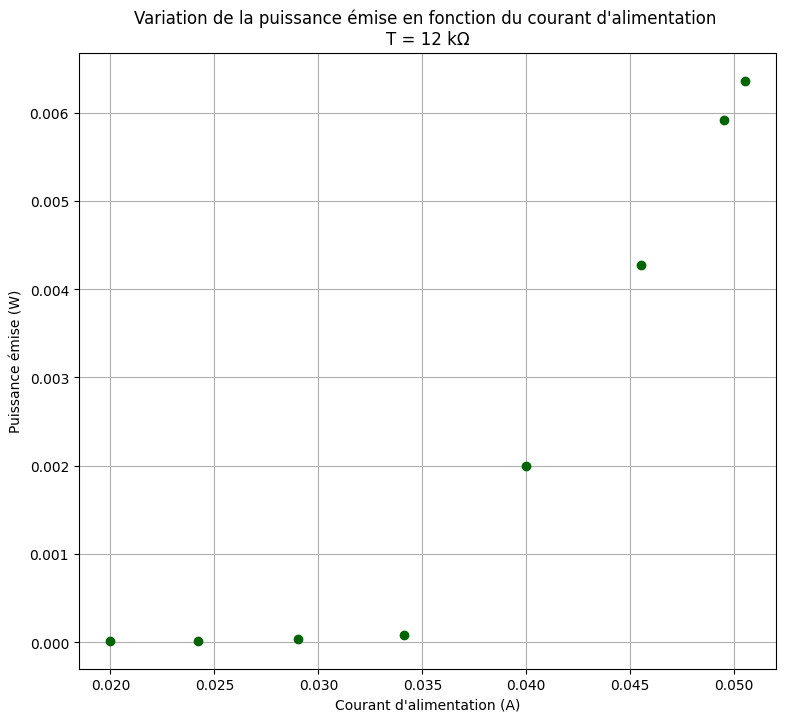

In [34]:
plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise_calcul, "o", color="darkgreen")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 12 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.grid()
plt.show()

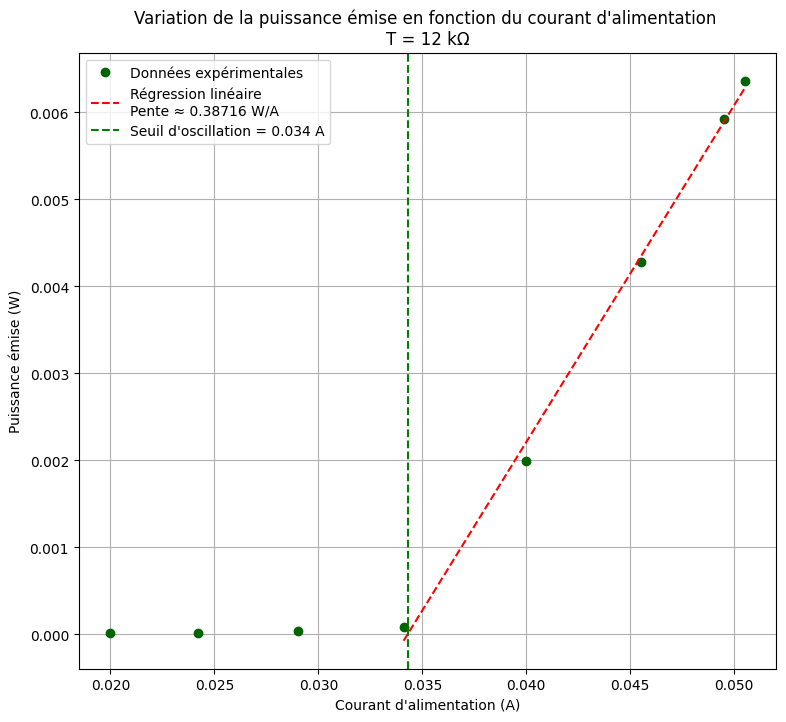

In [35]:
i_start, i_end = 3, 8
I_fit = I_alim[i_start:i_end]
P_fit = P_emise_calcul[i_start:i_end]
slope, intercept, r, _, _ = linregress(I_fit, P_fit)

seuil_osc= -intercept / slope

plt.figure(figsize=(9, 8))
plt.plot(I_alim, P_emise_calcul, 'o', label="Données expérimentales", color="darkgreen")
plt.plot(I_fit, slope * I_fit + intercept, 'r--',
         label=f"Régression linéaire \nPente ≈ {slope:.5f} W/A")
plt.axvline(seuil_osc, color='green', linestyle='--', label=f"Seuil d'oscillation = {seuil_osc:.3f} A")
plt.title("Variation de la puissance émise en fonction du courant d'alimentation \nT = 12 kΩ")
plt.xlabel("Courant d'alimentation (A)")
plt.ylabel("Puissance émise (W)")
plt.legend()
plt.grid()
plt.show()

In [36]:
# Puissance électrique dissipée (en W)
P_dissip = U_photo * I_alim

# Calcul de l'efficacité totale
eff_totale = P_emise_calcul / P_dissip

# Puissance seuil (à déterminer avec le graphe précédent ???)
idx_proche_seuil = (np.abs(I_alim - seuil_osc)).idxmin()
I_alim_reel_proche = I_alim[idx_proche_seuil]
P_seuil = P_emise_calcul[idx_proche_seuil]

# Calcul de l'efficacité différentielle
eff_diff = P_emise_calcul / (P_dissip - P_seuil) 

# Afficher les résultats
print(f"Efficacité totale : {np.mean(eff_totale):.5f}")
print(f"Efficacité différentielle : {np.mean(eff_diff):.5f} ")


Efficacité totale : 0.02274
Efficacité différentielle : 0.02276 


T = 10 kOhm : 
Seuil = 0.038 A

T = 12 kOhm :
Seuil = 0.034 A

Le seuil d'oscillation correspond au courant minimum nécessaire pour que la diode laser commence à émettre de la lumière.
Plus T augmente, plus seuil diminue.
La puissance émise augmente quand la T° augmente.